In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d barelydedicated/bank-customer-churn-modeling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 75.0MB/s]


In [10]:
! unzip /content/bank-customer-churn-modeling.zip

Archive:  /content/bank-customer-churn-modeling.zip
  inflating: Churn_Modelling.csv     


In [11]:
import pandas as pd
#Load the data
df=pd.read_csv('/content/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7270,7271,15706268,Smith,697,Germany,Male,51,1,147910.30,1,1,1,53581.14,0
6667,6668,15741921,Moon,622,Spain,Female,26,8,0.00,2,1,1,124964.82,0
1398,1399,15628947,Praed,693,France,Female,38,3,0.00,2,0,0,78133.48,1
3793,3794,15584037,Denisov,727,Germany,Male,58,5,106913.43,1,1,0,25881.00,1
3758,3759,15582910,Turnbull,514,France,Male,38,4,112230.38,1,1,0,16717.11,1


In [12]:
df.shape

(10000, 14)

In [13]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [16]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df[df.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [18]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


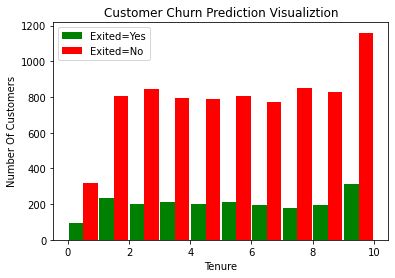

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

tenure_churn_0 = df[df.Exited==0].Tenure
tenure_churn_1 = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_1, tenure_churn_0], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


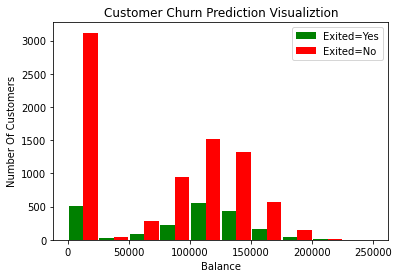

In [22]:
balance_churn_0 = df[df.Exited==0].Balance
balance_churn_1 = df[df.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([balance_churn_1, balance_churn_0], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


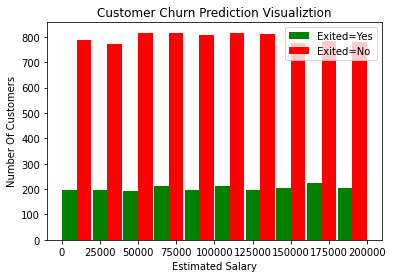

In [23]:
salary_churn_0 = df[df.Exited==0].EstimatedSalary
salary_churn_1 = df[df.Exited==1].EstimatedSalary

plt.xlabel("Estimated Salary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([salary_churn_1, salary_churn_0], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [25]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [26]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']


In [30]:
#Using One Hot Encoding for categorical column Geography
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [32]:
def check_age_category(x):
  if(x>50):
    return 1
  else:
    return 0

In [33]:
df1.Age=df1.Age.apply(check_age_category)

In [34]:
df1.Age.unique()

array([0, 1])

In [35]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [43]:
cols_to_scale=['Tenure','Balance','EstimatedSalary','CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [44]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [45]:
#Splitting train and test data
X=df1.drop('Exited',axis='columns')
y=df1['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [46]:
X_train.shape

(8000, 12)

In [47]:
X_test.shape

(2000, 12)

In [48]:
#Building a ANN model in tendorflow/keras
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
                        keras.layers.Dense(12,input_shape=(12,),activation='relu'),
                        keras.layers.Dense(7,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5699 - accuracy: 0.7011
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.8075
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.8184
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8226
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8245
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.8234
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.8255
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8314
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8342
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3913 - accura

In [49]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8380


[0.387067973613739, 0.8379999995231628]

In [59]:
yp=model.predict(X_test)

In [60]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
y_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [62]:
Y_test[:10]

937     0
9355    0
2293    1
192     0
8675    0
53      1
9596    0
265     0
984     0
9793    0
Name: Exited, dtype: int64

In [66]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1578
           1       0.76      0.34      0.47       422

    accuracy                           0.84      2000
   macro avg       0.80      0.65      0.69      2000
weighted avg       0.83      0.84      0.81      2000



Text(69.0, 0.5, 'Truth')

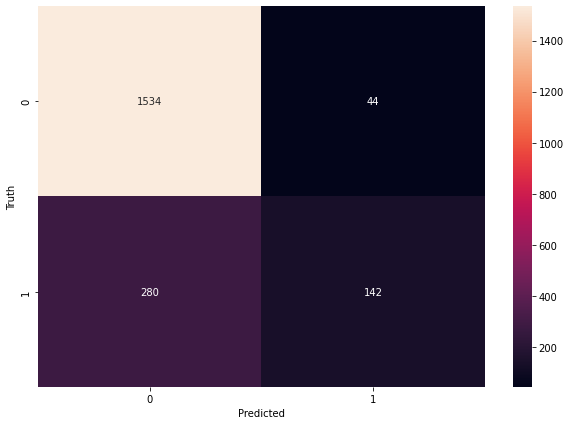

In [65]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
Y_test.shape

(2000,)

**Accuracy**

In [68]:
round((1534+142)/(1534+142+280+44),2)

0.84

**Precision for 0 class i.e. Precision for bank customers who did not churn**

In [69]:
round((1534)/(1534+280),2)

0.85

**Precision for 1 class i.e Precision for bank customers who actually churned**

In [70]:
round((142)/(142+44),2)

0.76

**Recall for 0 class**

In [71]:
round((1534)/(1534+44),2)

0.97

**Recall for 1 class**

In [72]:
round((142)/(280+142),2)

0.34

**F1- score for 0 class**

In [73]:
round(2*(0.85*0.97)/(0.85+0.92),2)

0.93

**F1- score for 1 class**

In [74]:
round(2*(0.76*0.34)/(0.76+0.34),2)

0.47